In [28]:
import pandas as pd
import numpy as np
import rapid_review as rr
import os
import matplotlib.pyplot as plt
import importlib
from sklearn.svm import SVC, OneClassSVM

## Pull the document metadata from the xml files from the Pubmed API

In [14]:
document_index = None

for fpath in os.listdir('../data/'):
    if "cohen_all" in fpath:
        ndf = rr.parse_pmxml(f'../data/{fpath}')
    if document_index is None:
        document_index = ndf
    else:
        document_index = pd.concat([document_index,ndf])
        
document_index = document_index.drop_duplicates()
print(document_index.shape)
document_index.head()

(17238, 3)


,PMID,ab,ti
0,9793700,"This randomized, double-blind, placebo-control...",Effect of subcutaneous naratriptan on forearm ...
1,9793701,A multicenter test was conducted to investigat...,Effect of operationalized computer diagnosis o...
2,9793702,Subcutaneous injection of sumatriptan is an ef...,Sumatriptan nasal spray (20 mg/dose) in the ac...
3,9793771,The efficacy and adverse effects of 0.25% apra...,The effect of 0.25% apraclonidine in preventin...
4,9793807,To determine if an intravenous (i.v.) fluid bo...,An intravenous fluid bolus is not necessary be...


## Load the cohen database of SRs
https://dmice.ohsu.edu/cohenaa/systematic-drug-class-review-data.html

In [5]:
cohen_db = pd.read_csv(
    '../data/epc-ir.clean.tsv',
    sep='\t',header=None,
    names=["review","EID","PMID","relevant","fulltext_relevant"]
)

cohen_db['relevant'] = np.where(cohen_db['relevant']=="I",1,0)
cohen_db = cohen_db[["review","PMID","relevant"]]

cohen_db.head()



,review,PMID,relevant
0,ACEInhibitors,10024335,0
1,ACEInhibitors,10027665,0
2,ACEInhibitors,10027935,0
3,ACEInhibitors,10028936,0
4,ACEInhibitors,10029645,1


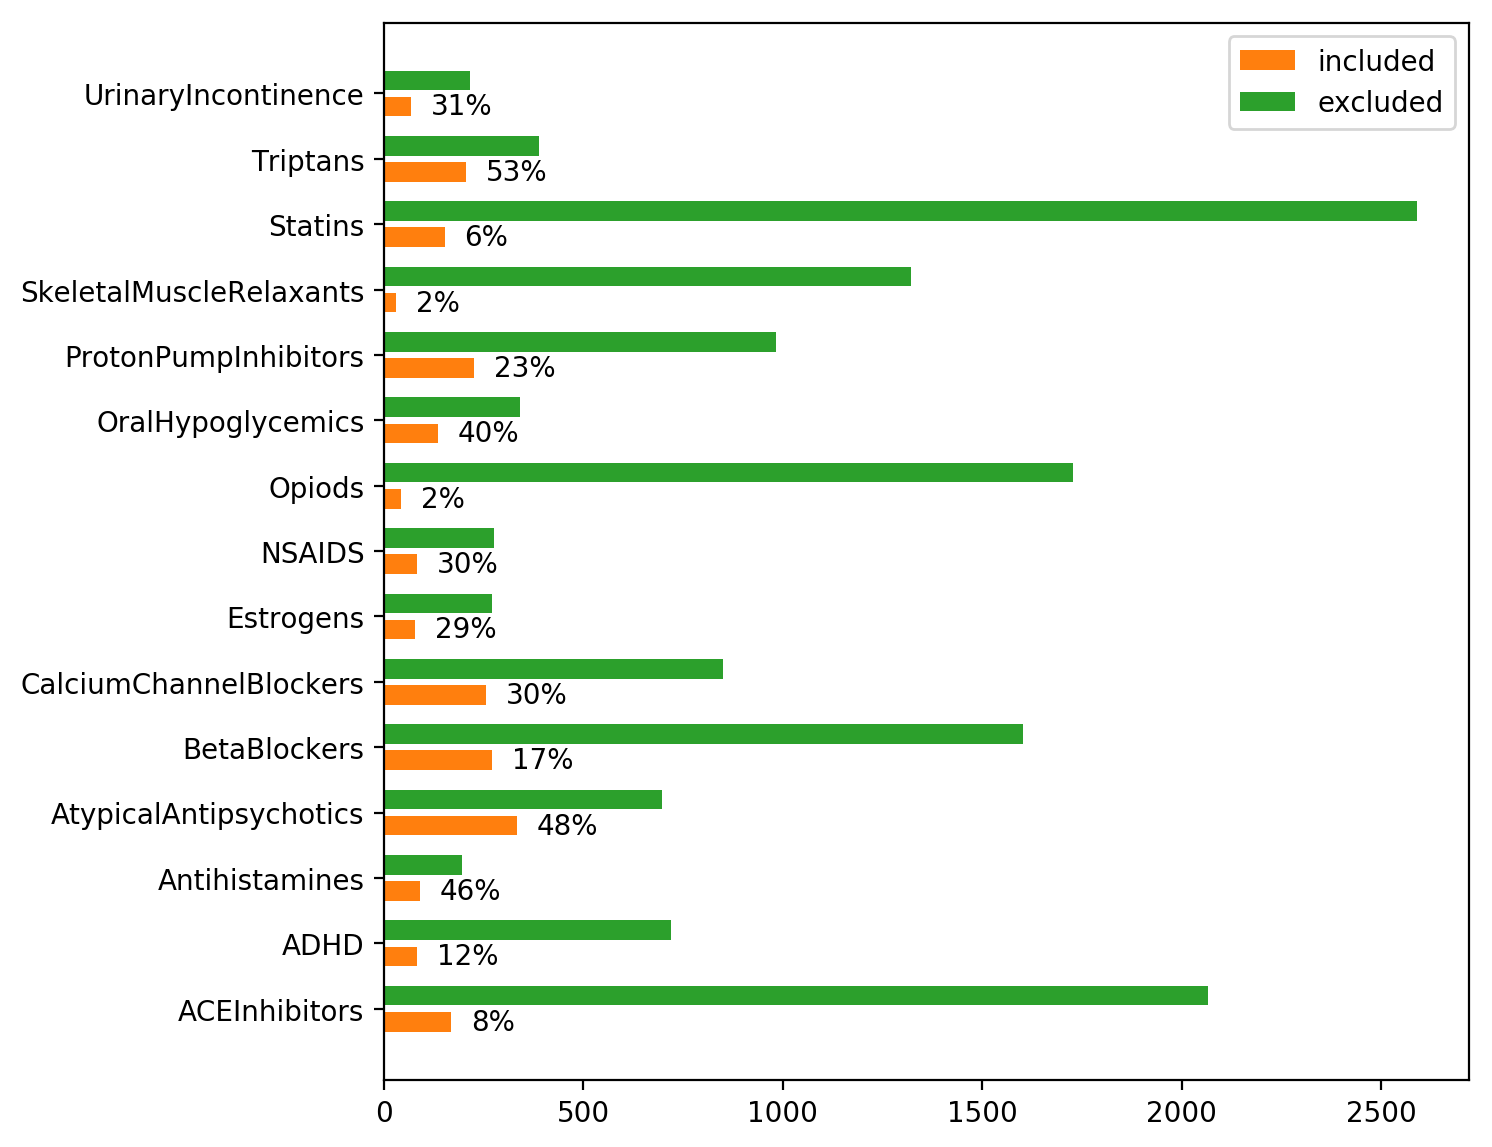

In [51]:
fig, ax = plt.subplots(figsize=(7,7),dpi=200)

cm = plt.cm.RdYlBu


ticklabels = []
for i, (name, group) in enumerate(cohen_db.groupby('review')):
    if i==0:
        l1="included"
        l2="excluded"
    else:
        l1 = None
        l2 = None
        
    group = pd.merge(
        group,
        document_index,
    )
    group = group.dropna()
    included = group[group['relevant']==1].shape[0]
    excluded = group[group['relevant']==0].shape[0]
    ax.barh(i-0.2, included, height=0.3, color='C1',label=l1)
    ax.barh(i+0.2, excluded, height=0.3, color='C2', label=l2)
    ax.text(included+50, i-0.2, f'{included/excluded:.0%}', ha="left", va="center")
    ticklabels.append(name)
        
ax.set_yticks([i for i,v in enumerate(ticklabels)])
ax.set_yticklabels(ticklabels)

ax.legend()
    
    
plt.show()

In [157]:
importlib.reload(rr)
models = [
    SVC(kernel='linear',C=5,probability=True)
]

for name, group in cohen_db.groupby('review'):
    if name!="ADHD":
        continue
    df = pd.merge(
        group,
        document_index,
    )
    df = df.dropna().reset_index(drop=True)
    ss = rr.ScreenScenario(
        df, models,[100]
    )
    break
    
print(ss)

a screening scenario with 803 documents


In [ ]:
importlib.reload(rr)

fig, ax = plt.subplots(figsize=(7,7),dpi=200)
for i in range(10):
    ss.screen_bir()
    ax.scatter(ss.wss95, ss.recall)

plt.show()

In [159]:
print(ss.wss95, ss.recall)

0.0 1.0


In [153]:
self = ss
self.wss95

0.701120797011208

In [138]:
y_pred = clf.predict_proba(self.X[unseen_index])[:,1]
y_pred

array([0.00688249, 0.05618756, 0.02022122, 0.02833732, 0.05692595,
       0.02385224, 0.0736    , 0.05495706, 0.01790374, 0.01191379,
       0.02210504, 0.00904478, 0.01142716, 0.1761259 , 0.03370191,
       0.01778597, 0.01477862, 0.53984592, 0.93473251, 0.04256496,
       0.01374109, 0.0117875 , 0.03984582, 0.48015174, 0.01292691,
       0.0082449 , 0.00872607, 0.02386   , 0.01361866, 0.01255072,
       0.64280225, 0.19563549, 0.013528  , 0.02767337, 0.00791604,
       0.0544533 , 0.1053945 , 0.01943571, 0.01885252, 0.00455023,
       0.02760527, 0.02466777, 0.02031392, 0.01896934, 0.01796372,
       0.00830433, 0.65223615, 0.03512458, 0.02836501, 0.01250462,
       0.01758838, 0.01845313, 0.06617643, 0.01564827, 0.55990948,
       0.01274833, 0.01204909, 0.04355511, 0.03277495, 0.27939765,
       0.22112896, 0.01077811, 0.0100851 , 0.01431386, 0.00901837,
       0.02079294, 0.02948905, 0.01604959, 0.04079701, 0.06007206,
       0.03455976, 0.88053931, 0.0123402 , 0.19389714, 0.05526

In [143]:
y_pred[(-y_pred).argsort()[:5]]

array([0.99407862, 0.98304689, 0.97105191, 0.96423431, 0.9638114 ])

In [122]:
self.X = rr.TfidfVectorizer(
    ngram_range=(1,2),
    min_df=5, max_df=0.6, strip_accents='unicode', 
    max_features=10000,
    use_idf=1,
    smooth_idf=1, sublinear_tf=1,
    stop_words="english",tokenizer=rr.tokenize
).fit_transform(df['ab'])
self.X
    

/home/max/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<803x2267 sparse matrix of type '<class 'numpy.float64'>'
	with 42741 stored elements in Compressed Sparse Row format>

In [123]:
df['ab']

0      To compare the analgesic effects of preoperati...
1      Use of nicotine-replacement therapies and the ...
2      Three experiments were conducted to explore th...
3      We sought to determine whether spinal clonidin...
4      Drug-induced psychosis is a difficult problem ...
5      We examined relapse after response to a first ...
6      We report the findings from the first large, d...
7      We investigated the effects of a single admini...
8      Concern based on the reported short-term adver...
9      The United Kingdom Parkinson's Disease Researc...
10     Seeing as gamma-hydroxybutyrate (GHB) and benz...
11     In this study we examined changes in attention...
12     Advanced controlled release (CR) dosage forms ...
13     The present study compares, using a double-bli...
14     In this double-blind study, patients with an a...
15     Overall, most spinal drugs in clinical use hav...
16     This study examined changes in attention-defic...
17     We evaluated separate an

In [112]:
sids = random.sample(list(df.index),5)
print(sids)
df.loc[sids, 'seen'] = 1

i = df.query('seen==1 & relevant==1').index
len(i)

[451, 559, 824, 448, 331]


13